In [13]:
'''
---------------------------------------------------------------------------------
| Topic   | Bayesian Parameter Estimation using MCMC (Markov Chain Monte Carlo) |
---------------------------------------------------------------------------------
| Author  | Akshett Rai Jindal (2019114001)                                     |
---------------------------------------------------------------------------------
| Team    | PizzaPizzaPizza                                                     |
---------------------------------------------------------------------------------
| Dataset | COVID-19 World Statistics                                           |
---------------------------------------------------------------------------------
'''

'\n---------------------------------------------------------------------------------\n| Topic   | Bayesian Parameter Estimation using MCMC (Markov Chain Monte Carlo) |\n---------------------------------------------------------------------------------\n| Author  | Akshett Rai Jindal (2019114001)                                     |\n---------------------------------------------------------------------------------\n| Team    | PizzaPizzaPizza                                                     |\n---------------------------------------------------------------------------------\n| Dataset | COVID-19 World Statistics                                           |\n---------------------------------------------------------------------------------\n'

In [14]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import scipy
import scipy.stats as stats
import scipy.optimize as opt

## Loading the Dataset

In [15]:
COVID_DATA_FILE_PATH = '../data/day_wise_covid_stats.csv'

covid_data = pd.read_csv(COVID_DATA_FILE_PATH, index_col=0)

            Confirmed  Deaths  Recovered   Active  New cases  New deaths  \
Date                                                                       
2020-01-22        555      17         28      510          0           0   
2020-01-23        654      18         30      606         99           1   
2020-01-24        941      26         36      879        287           8   
2020-01-25       1434      42         39     1353        493          16   
2020-01-26       2118      56         52     2010        684          14   
...               ...     ...        ...      ...        ...         ...   
2020-07-23   15510481  633506    8710969  6166006     282756        9966   
2020-07-24   15791645  639650    8939705  6212290     281164        6144   
2020-07-25   16047190  644517    9158743  6243930     255545        4867   
2020-07-26   16251796  648621    9293464  6309711     204606        4104   
2020-07-27   16480485  654036    9468087  6358362     228693        5415   

           

In [16]:
%matplotlib inline
plt.style.use('bmh')

## Data Visualization

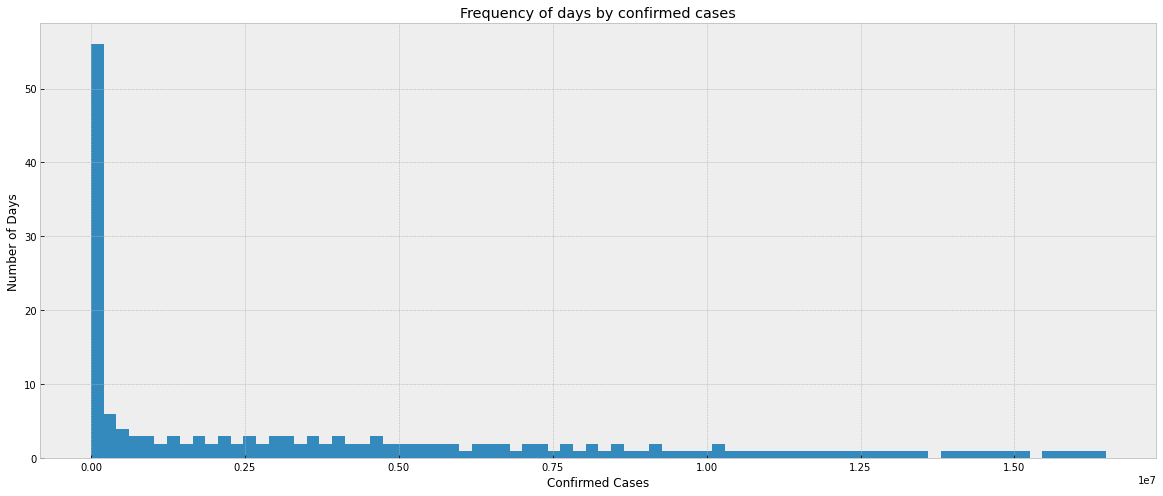

In [17]:
fig = plt.figure(figsize=(20, 8))
_ = plt.title('Frequency of days by confirmed cases')
_ = plt.xlabel('Confirmed Cases')
_ = plt.ylabel('Number of Days')
_ = plt.hist(covid_data['Confirmed'].values,
             histtype='stepfilled', bins=80)

In [18]:
# fig = plt.figure(figsize=(11, 8))
# _ = plt.title('Frequency of days by Deaths')
# _ = plt.xlabel('Deaths')
# _ = plt.ylabel('Number of Days')
# _ = plt.hist(covid_data['Deaths'].values,
#              histtype='stepfilled', bins=80)

In [19]:
with pm.Model() as model:

    mu = pm.Uniform('mu', upper=10000, lower=0,)
    likelihood = pm.Poisson('likelihood', mu=mu, observed=covid_data['Confirmed'].values)

    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(600000, step, start=start, progressbar=True)

/tmp/ipykernel_653038/3275307149.py:8: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(600000, step, start=start, progressbar=True)
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [mu]


Sampling 4 chains for 1_000 tune and 600_000 draw iterations (4_000 + 2_400_000 draws total) took 192 seconds.
The number of effective samples is smaller than 25% for some parameters.


/tmp/ipykernel_653038/1355649105.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  _ = pm.traceplot(trace, var_names=['mu'], figsize=(20, 8))
Got error No model on context stack. trying to find log_likelihood in translation.
/home/akshettrj/iiith/3.1/smai/project/PizzaPizzaPizza/mcmc/mcmc/.venv/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


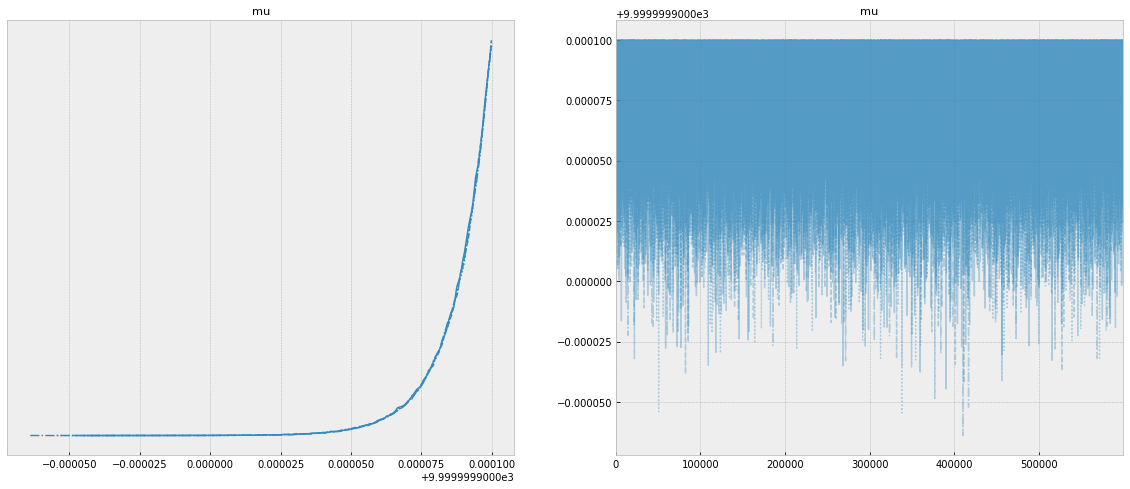

In [20]:
_ = pm.traceplot(trace, var_names=['mu'], figsize=(20, 8))

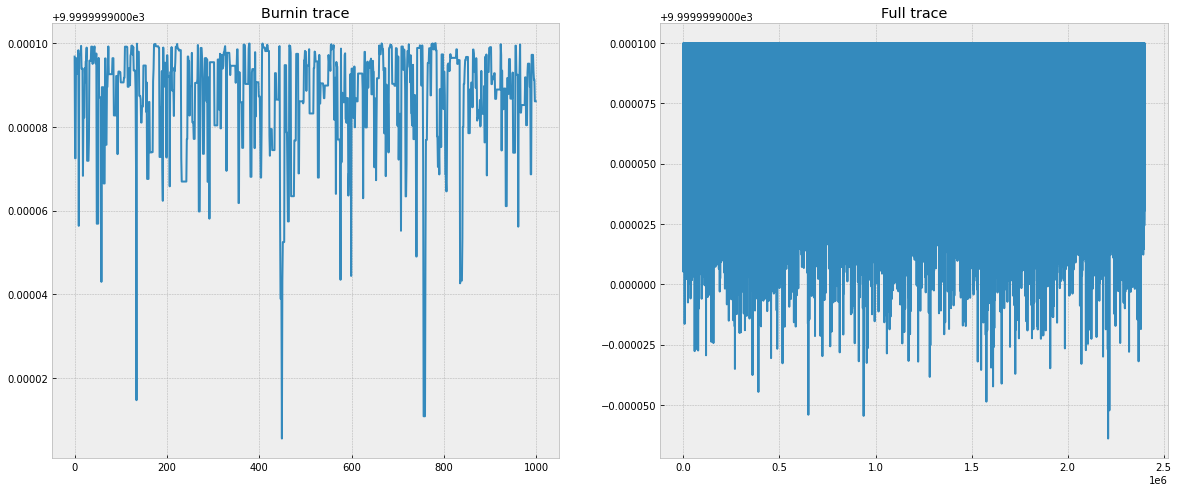

In [21]:
# Plot the posterior distributions of the parameters
fig = plt.figure(figsize=(20,8))
plt.subplot(121)
_ = plt.title('Burnin trace')
# _ = plt.ylim(ymin=16.5, ymax=19.5)
_ = plt.plot(trace.get_values('mu')[:1000])
fig = plt.subplot(122)
_ = plt.title('Full trace')
# _ = plt.ylim(ymin=16.5, ymax=19.5)
_ = plt.plot(trace.get_values('mu'))

/tmp/ipykernel_653038/3640650850.py:1: DeprecationWarning: The function `autocorrplot` from PyMC3 is just an alias for `plot_autocorr` from ArviZ. Please switch to `pymc3.plot_autocorr` or `arviz.plot_autocorr`.
  _ = pm.autocorrplot(trace[:2000], var_names=['mu'], grid=(4, 1))
Got error No model on context stack. trying to find log_likelihood in translation.
/home/akshettrj/iiith/3.1/smai/project/PizzaPizzaPizza/mcmc/mcmc/.venv/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


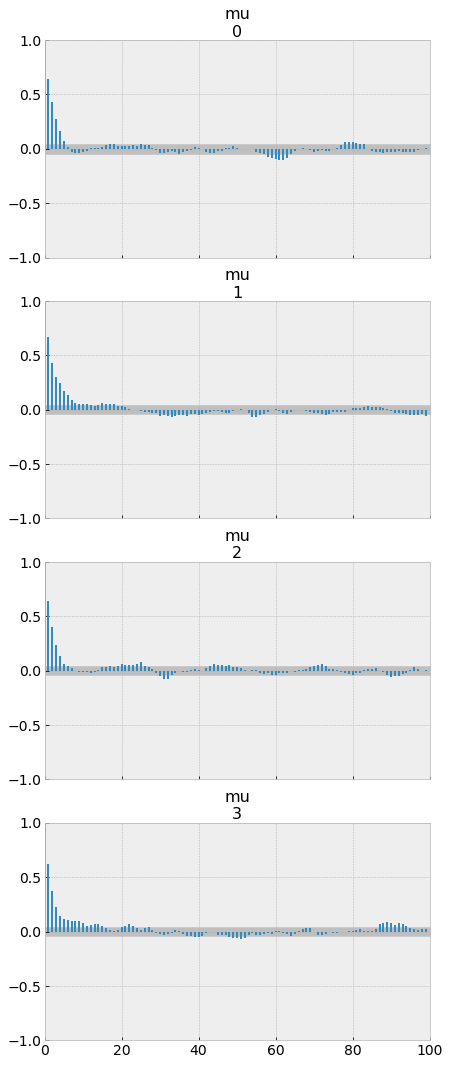

In [22]:
_ = pm.autocorrplot(trace[:2000], var_names=['mu'], grid=(4, 1))

# For Google Hangouts data

In [24]:
HANGOUTS_DATA_FILE_PATH = '../data/hangout_chat_data.csv'

messages = pd.read_csv(HANGOUTS_DATA_FILE_PATH)

In [25]:
with pm.Model() as model:
    mu = pm.Uniform('mu', lower=0, upper=60)
    likelihood = pm.Poisson('likelihood', mu=mu, observed=messages['time_delay_seconds'].values)

    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(200000, step, start=start, progressbar=True)

/tmp/ipykernel_653038/2220172099.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(200000, step, start=start, progressbar=True)
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [mu]


Sampling 4 chains for 1_000 tune and 200_000 draw iterations (4_000 + 800_000 draws total) took 58 seconds.
The number of effective samples is smaller than 25% for some parameters.


/tmp/ipykernel_653038/2299847493.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  _ = pm.traceplot(trace, var_names=['mu'])
Got error No model on context stack. trying to find log_likelihood in translation.
/home/akshettrj/iiith/3.1/smai/project/PizzaPizzaPizza/mcmc/mcmc/.venv/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


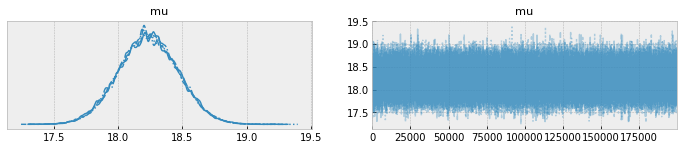

In [26]:
_ = pm.traceplot(trace, var_names=['mu'])

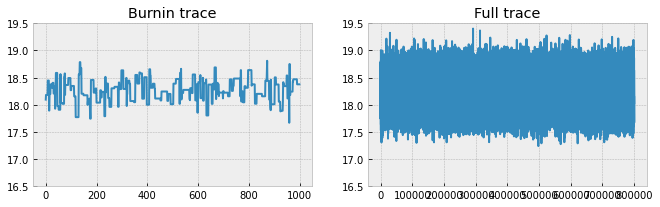

In [27]:
fig = plt.figure(figsize=(11,3))
plt.subplot(121)
_ = plt.title('Burnin trace')
_ = plt.ylim(ymin=16.5, ymax=19.5)
_ = plt.plot(trace.get_values('mu')[:1000])
fig = plt.subplot(122)
_ = plt.title('Full trace')
_ = plt.ylim(ymin=16.5, ymax=19.5)
_ = plt.plot(trace.get_values('mu'))

/tmp/ipykernel_653038/3858080706.py:1: DeprecationWarning: The function `autocorrplot` from PyMC3 is just an alias for `plot_autocorr` from ArviZ. Please switch to `pymc3.plot_autocorr` or `arviz.plot_autocorr`.
  _ = pm.autocorrplot(trace[:2000], var_names=['mu'])
Got error No model on context stack. trying to find log_likelihood in translation.
/home/akshettrj/iiith/3.1/smai/project/PizzaPizzaPizza/mcmc/mcmc/.venv/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


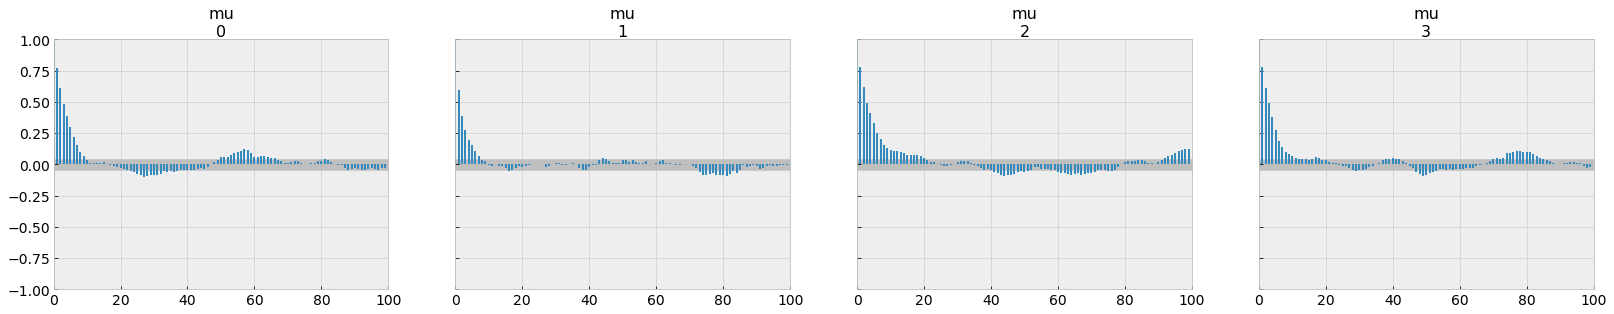

In [28]:
_ = pm.autocorrplot(trace[:2000], var_names=['mu'])